In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/minesh/myDataRoot/myKeys/twitter-analytics-1291-bq-fda6ac3c357b.json"

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/minesh/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.cloud import bigquery
bq_client = bigquery.Client()

In [11]:
# q = """ 
#     SELECT
#       *
#     FROM
#       `bigquery-public-data.wikipedia.pageviews_2019`
#     WHERE
#       DATE(datehour) < "2020-01-01"
#       /* AND wiki ="en" */
#       AND title = "Main_Page"
#     ORDER BY
#       /* views DESC */
#       datehour
# """
# result_df = bq_client.query(q).to_dataframe()

In [10]:
# result_df.to_csv("result_df-main_page-all_lang.csv")

In [13]:
result_df = pd.read_csv("result_df-main_page-all_lang.csv", index_col=0)
result_df

/home/minesh/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,datehour,wiki,title,views
0,2019-01-01 00:00:00+00:00,simple,Main_Page,227
1,2019-01-01 00:00:00+00:00,sco,Main_Page,27
2,2019-01-01 00:00:00+00:00,simple.m,Main_Page,120
3,2019-01-01 00:00:00+00:00,simple.b,Main_Page,1
4,2019-01-01 00:00:00+00:00,simple.q,Main_Page,2
...,...,...,...,...
1065145,2019-12-31 23:00:00+00:00,cho,Main_Page,10
1065146,2019-12-31 23:00:00+00:00,beta.v,Main_Page,21
1065147,2019-12-31 23:00:00+00:00,beta.m.v,Main_Page,1
1065148,2019-12-31 23:00:00+00:00,cho.m,Main_Page,1


In [15]:
mask = (result_df["wiki"]=="en")  # & ()

In [23]:
selected_df = result_df[mask] #.groupby(["datehour","wiki"]).reset_index()

In [24]:
selected_df = selected_df.set_index("datehour")

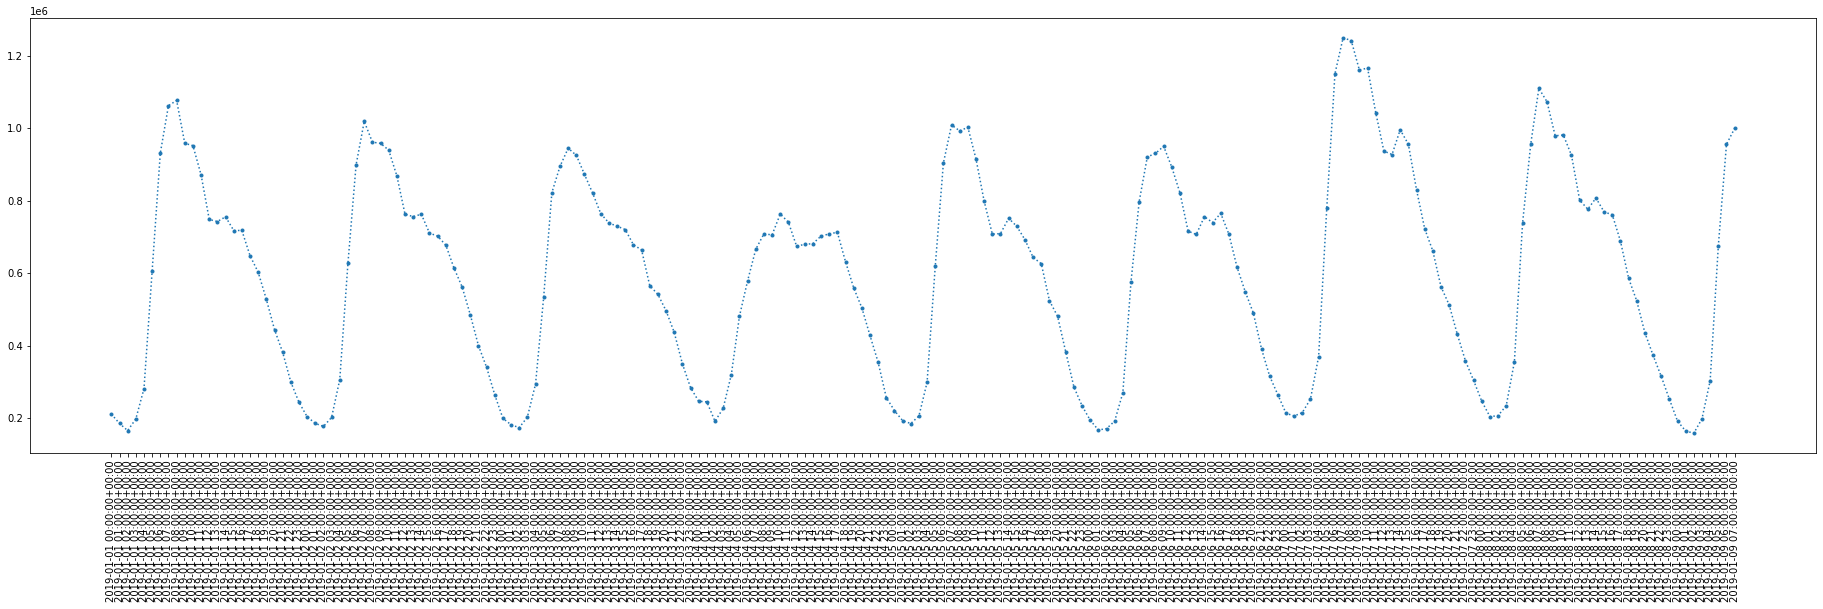

In [38]:
plt.subplots(figsize=(32,8))
plt.plot(selected_df["views"][:200], ".:")
plt.xticks(rotation=90)
plt.show()

In [33]:
selected_df["views"]

datehour
2019-01-01 00:00:00+00:00    211234
2019-01-01 01:00:00+00:00    185220
2019-01-01 02:00:00+00:00    165603
2019-01-01 03:00:00+00:00    197799
2019-01-01 04:00:00+00:00    281485
                              ...  
2019-12-31 19:00:00+00:00    327683
2019-12-31 20:00:00+00:00    277622
2019-12-31 21:00:00+00:00    250287
2019-12-31 22:00:00+00:00    230027
2019-12-31 23:00:00+00:00    211130
Name: views, Length: 8760, dtype: int64

In [42]:
selected_df.index = pd.to_datetime(selected_df.index)

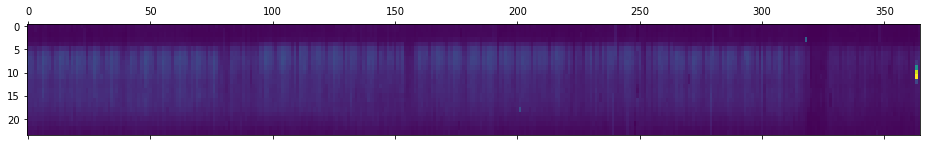

In [77]:
groups = selected_df["views"].groupby(pd.Grouper(freq='24h'))
years = pd.DataFrame()
for name, group in groups:
	years[name.dayofyear] = group.values
# years = years.T
plt.matshow(years, aspect='auto') # , interpolation=None
plt.show()

In [63]:
name.dayofyear

365

In [74]:
years.min().min(), years.max().max()  #describe().T.describe()

(94471, 5201636)

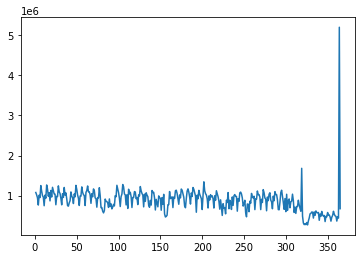

In [79]:
years.max(0).plot()

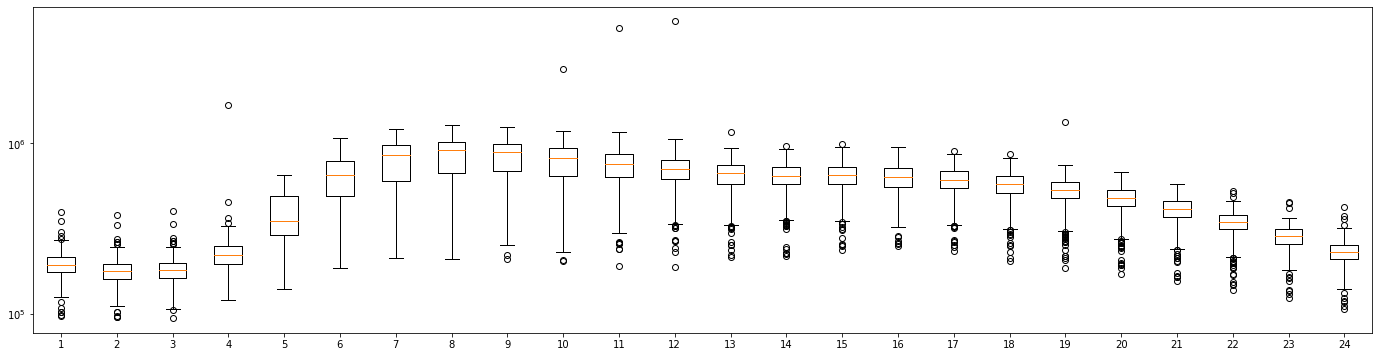

In [97]:
plt.subplots(figsize=(24,6))
# years.max(1).plot(style="-")
plt.boxplot(years);
# years.min(1).plot(style="-")
plt.yscale("symlog")

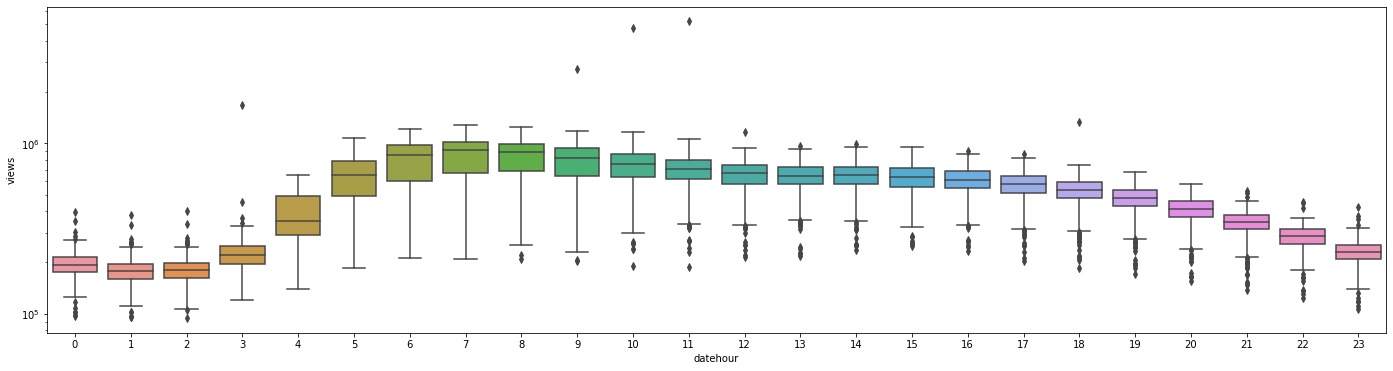

In [112]:
f,ax = plt.subplots(figsize=(24,6))

g=sns.boxplot(selected_df.index.to_series().dt.hour, selected_df["views"], ax=ax)
g.set_yscale("log")


In [100]:
years

,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
0,211234,203809,199406,246595,220855,194181,213487,246647,191713,190957,...,138194,154013,140413,129921,138611,168513,135409,148085,143761,215508
1,185220,185458,181801,244889,193190,167297,205917,204086,164266,158965,...,121268,145717,129676,125835,129295,146601,124004,136365,131931,196984
2,165603,177083,173712,191399,185006,171017,215251,206912,158520,154275,...,122489,134552,127702,122448,124672,143743,118987,131183,133949,186208
3,197799,202065,202844,227011,205909,191900,252642,234341,198460,191615,...,142088,145407,149646,135684,146912,159739,135980,138060,160019,196478
4,281485,306336,293970,319906,298720,270080,369825,355410,303365,295760,...,180744,211601,200356,170971,212921,213457,201756,154066,223686,251869
5,604890,626915,534513,481535,618649,576517,780536,737557,675183,555914,...,342928,415810,383649,319960,332716,289272,362477,292442,385402,440068
6,931420,899027,822324,579327,903944,797510,1150675,956056,955768,829493,...,448547,556914,493397,450631,414693,304745,465042,405504,545784,599939
7,1062647,1019090,895004,666085,1009233,921145,1249864,1110244,999887,960496,...,505789,607987,534355,492420,448822,301572,472247,438968,594799,673043
8,1076930,961883,945117,708844,992963,930686,1242387,1073345,980907,962285,...,504362,581252,522666,458387,482278,323520,468484,434712,883267,620028
9,958547,958480,925559,705753,1002916,950414,1160654,979392,930684,956032,...,447090,504782,474884,412701,449768,333705,431905,414245,2743296,547392
